
### Importing Libraries
Import necessary libraries for data analysis and visualization.


In [11]:

import pandas as pd
import matplotlib.pyplot as plt



### Load the Dataset
Load the Chipotle dataset from the provided CSV file.


In [12]:

file_path = './chipotle.csv'  # Replace with the correct path
chipotle_data = pd.read_csv(file_path, delimiter='\t')
chipotle_data.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
print(chipotle_data.isna().sum())

      order_id  quantity  item_name  choice_description  item_price
0        False     False      False                True       False
1        False     False      False               False       False
2        False     False      False               False       False
3        False     False      False                True       False
4        False     False      False               False       False
...        ...       ...        ...                 ...         ...
4617     False     False      False               False       False
4618     False     False      False               False       False
4619     False     False      False               False       False
4620     False     False      False               False       False
4621     False     False      False               False       False

[4622 rows x 5 columns]



### Data Preprocessing
Convert 'item_price' from a string to a float and handle any missing values.


In [3]:

# Convert 'item_price' to numerical format
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$', '').astype(float)




### Sales Analysis
Calculate the total order count and total sales for each item.


In [4]:

sales_analysis = chipotle_data.groupby('item_name').agg(
    Total_Orders=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)
sales_analysis.head()


,item_name,Total_Orders,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04



### Customer Preference Analysis
Analyze the variety of choices for the most popular items.


In [6]:

# Analyze the choice_description for popular items
popular_items = sales_analysis.head(5)['item_name']
chipotle_data[chipotle_data['item_name'].isin(popular_items)].groupby('item_name')['choice_description'].value_counts().head(10)


item_name     choice_description                                                               
Chicken Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                      17
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]    14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]               14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                    13
              [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                        13
              [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                            13
              [Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]              12
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                        11
              [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                  


### Price Analysis
Understand the relationship between item price and order quantity.


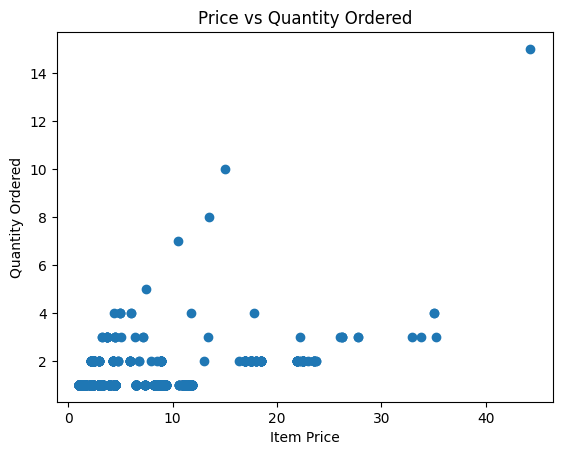

In [7]:

# Analyze the relationship between item price and order quantity
plt.scatter(chipotle_data['item_price'], chipotle_data['quantity'])
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.show()



### Predicting Order Quantity using Regression Models
Predict the quantity of an item a customer is likely to order based on item features and customer characteristics.


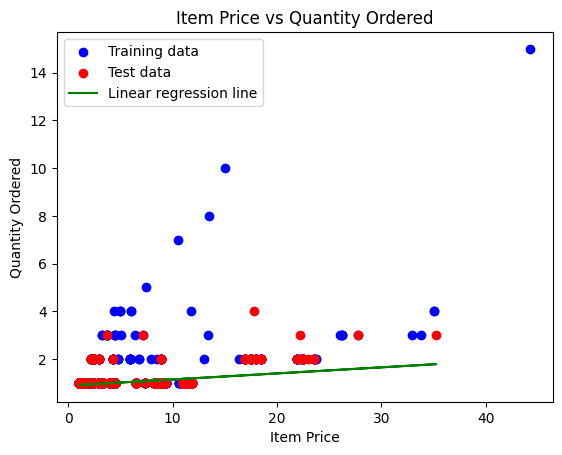

In [9]:

# Example code for predicting order quantity using Linear Regression (Detailed implementation will depend on available data and features)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'order_data' contains features and 'order_quantity' is the target
order_data = chipotle_data[['item_price']]
order_quantity = chipotle_data['quantity']

# Training a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(order_data, order_quantity)

X_train, X_test, y_train, y_test = train_test_split(order_data, order_quantity, test_size=0.2, random_state=42)

y_pred = lin_reg.predict(X_test)


plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, y_pred, color='green', label='Linear regression line')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')
plt.legend()
plt.show()
# Predicting order quantities for new data
# predicted_quantities = lin_reg.predict(new_order_data)

# Analyzing the predictions
# ...



"""
The scatter plot with the linear regression line, showing the relationship between item price and quantity ordered, provides several valuable insights for the company:

1. **Understanding Customer Behavior**: The plot reveals how customers' order quantities vary with the price of items. For instance, if most orders cluster around lower-priced items, it might indicate price sensitivity among customers.

2. **Pricing Strategy**: By observing the distribution of orders across different price points, the company can assess the effectiveness of its pricing strategy. If higher-priced items have significantly fewer orders, it might suggest the need for pricing adjustments or promotions.

3. **Product Portfolio Management**: The visualization can help identify which price ranges are most popular among customers. This information can guide decisions on which items to promote more heavily or which new products to introduce.

4. **Demand Forecasting**: Understanding the relationship between price and quantity can assist in predicting future demand for products, aiding in inventory management and supply chain optimization.

5. **Marketing and Promotions**: Insights from the plot can inform marketing strategies. For example, if certain price points are more popular, marketing efforts can be tailored to highlight items within these ranges.

6. **Revenue Optimization**: By analyzing how changes in prices impact order quantities, the company can make data-driven decisions to optimize revenue. For example, slight increases in prices may not significantly affect the quantity ordered, leading to higher revenue without losing customers.

7. **Model Limitations and Business Decisions**: The simplicity of the model and any visible discrepancies between the model's predictions and actual data points highlight the complexity of customer behavior. This recognition can drive further analysis and the development of more sophisticated models.

In summary, this analysis helps the company understand the dynamics of customer orders in relation to pricing, providing a foundation for informed decision-making in various business areas, including marketing, pricing strategy, product management, and supply chain operations.
"""

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


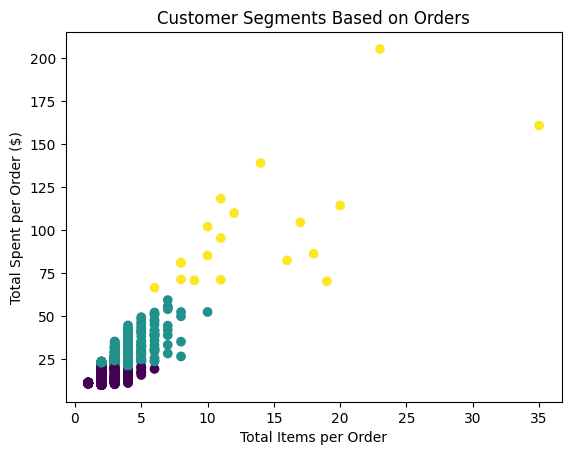

In [10]:
# Using the real Chipotle dataset to perform customer segmentation
# We will aggregate data to create a per-order basis dataset that represents total items and total amount spent per order

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aggregating data by order_id
order_data = chipotle_data.groupby('order_id').agg(
    Total_Items=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Spent=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index()

# Applying K-Means clustering on the aggregated order data
kmeans = KMeans(n_clusters=3)
order_segments = kmeans.fit_predict(order_data[['Total_Items', 'Total_Spent']])

# Plotting the customer segments based on orders
plt.scatter(order_data['Total_Items'], order_data['Total_Spent'], c=order_segments, cmap='viridis')
plt.xlabel('Total Items per Order')
plt.ylabel('Total Spent per Order ($)')
plt.title('Customer Segments Based on Orders')
plt.show()


In [ ]:
The visual representation shown in the scatter plot depicts customer segmentation based on total items per order and total amount spent per order. Here's what this means for the company:

### Clusters Identified by K-Means:
- Different colors represent different clusters, which are groups of orders with similar characteristics in terms of item quantity and spending.

### Segment Analysis:
1. **Purple Cluster (Lower Left)**: Orders in this segment have fewer items and lower total spend. This group might consist of individual customers or small orders.
2. **Yellow Cluster (Center Left)**: Orders here have a moderate number of items and spend. This could represent regular meals for small groups or individuals who order more items.
3. **Cyan Cluster (Top Right)**: Orders with a higher total spend and more items. These might be large group orders or high spenders.

### Business Imp

lications and Strategies:
- **Targeted Marketing**: The company can create targeted marketing campaigns for each segment. For example, sending discount coupons to the purple cluster to encourage them to spend more, or rewarding the cyan cluster with loyalty points to ensure they keep coming back.
- **Menu Optimization**: The company might consider menu adjustments or bundled offers that appeal to each segment, such as value meals for the purple cluster or family deals for the cyan cluster.
- **Resource Allocation**: Understanding the distribution of order sizes can help with resource allocation, such as inventory management and staff scheduling, to meet the demand patterns of each segment.
- **Customer Experience**: Personalize the customer experience by recognizing the ordering patterns of each segment and tailoring the service accordingly, such as offering quicker checkout for smaller orders or customized catering services for large orders.
- **Strategic Expansion**: If a particular segment is highly profitable or growing, the company might focus on expanding services that cater to that segment's needs, such as enhancing the mobile ordering experience for tech-savvy customers in the cyan cluster.

By analyzing these segments, the company can better understand their customer base and refine their business strategies for improved customer satisfaction and increased profitability.